<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

In [397]:
from ydata_profiling import ProfileReport
from IPython.display import IFrame


### **Задание 0**
Для чего фиксируем сиды в домашках?

`Устанавливать сид нужно для установки начального состояния генератора случайных чисел, чтобы обеспечить воспроизводимость результатов`

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [398]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [399]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [400]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [x] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [x] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [x] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [x] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [401]:
for col, value in pd.concat([df_train, df_test]).isna().sum().items():
    if value > 0:
        print(f'{value} пропуск(ов) в столбце {col}')

221 пропуск(ов) в столбце mileage
221 пропуск(ов) в столбце engine
215 пропуск(ов) в столбце max_power
222 пропуск(ов) в столбце torque
221 пропуск(ов) в столбце seats


In [402]:
if pd.concat([df_train, df_test]).duplicated(keep=False).sum():
    print('Дубли есть')

Дубли есть


In [403]:
report = ProfileReport(pd.concat([df_train, df_test]), title="Profiling Report", explorative=True)
report.to_file("report.html")

Summarize dataset:  75%|▊| 15/20 [00:00<00:00, 54.24it/s, Calculate auto correla/Users/romanwilson/venv/lib/python3.9/site-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x17ed7ba80, file "/Users/romanwilson/venv/lib/python3.9/site-packages/ydata_profiling/model/pandas/correlations_pandas.py", line 167>')
  warnings.warn(
Export report to file: 100%|█████████████████████| 1/1 [00:00<00:00, 265.40it/s]


In [404]:
IFrame(src='report.html', width=1300, height=600)

`Дашборд выдает общую статистику по датасету, а так же статистики по всем признакам. В случае текстовых признаков выдает картинку размеров самых популярных слов, а случае числовых - график его распределения со всеми описательными значениями: уникальные значения, пропуски, повторения и т.д.`

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [x] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [x] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [x] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [405]:
df_train.describe(include='number')

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [406]:
df_test.describe(include='number')

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [407]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [408]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


In [409]:
train_numerical = df_train.select_dtypes(include='number')
test_numerical = df_test.select_dtypes(include='number')

pd.DataFrame({
    'Train Mean': train_numerical.mean(),
    'Train Median': train_numerical.median(),
    'Test Mean': test_numerical.mean(),
    'Test Median': test_numerical.median()
})

,Train Mean,Train Median,Test Mean,Test Median
year,2013.818403,2015.0,2013.681000,2014.0
selling_price,639515.197171,450000.0,617901.042000,434999.0
km_driven,69584.615517,60000.0,71393.341000,61500.0
seats,5.419008,5.0,5.410805,5.0


`В целом, данные по годам и количеству мест достаточно схожи между тренировочной и тестовой выборками, но цена продажи и пробег показывают некоторые различия. Я бы не стал утверждать, что разница сильно критичная, чтобы с ней что-то делать`

### **Задание 3 (0.2 балла)**

- [x] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [x] Отобразите такие объекты (0.05 балла)
- [x] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [x]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [410]:
duplicates = df_train[df_train.duplicated(subset=df_train.columns.difference(['selling_price']), keep=False)]

In [411]:
print(f"Количество объектов с одинаковым описанием: {len(duplicates)}")

Количество объектов с одинаковым описанием: 1799


In [412]:
duplicates

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [413]:
df_train = df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']), keep='first')
df_train.reset_index(drop=True, inplace=True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [414]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [x] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [x] Приведите тип данных к ``float``.
* [x] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [415]:
df_train["mileage"] = df_train["mileage"].str.extract(r"([\d.]+)").astype('float64')
df_train["engine"] = df_train["engine"].str.extract(r"([\d.]+)").astype('float64')
df_train["max_power"] = df_train["max_power"].str.extract(r"([\d.]+)").astype('float64')

df_test["mileage"] = df_test["mileage"].str.extract(r"([\d.]+)").astype('float64')
df_test["engine"] = df_test["engine"].str.extract(r"([\d.]+)").astype('float64')
df_test["max_power"] = df_test["max_power"].str.extract(r"([\d.]+)").astype('float64')

/var/folders/_s/z080ysrn2lg2mfymztfrs1000000gn/T/ipykernel_14643/2751747755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["mileage"] = df_train["mileage"].str.extract(r"([\d.]+)").astype('float64')
/var/folders/_s/z080ysrn2lg2mfymztfrs1000000gn/T/ipykernel_14643/2751747755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["engine"] = df_train["engine"].str.extract(r"([\d.]+)").astype('float64')
/var/folders/_s/z080ysrn2lg2mfymztfrs1000000gn/T/ipykernel_14643/2751747755.py:3: Settin

`в данной задаче с регулярными выражениями мне помог perplexity.ai`

In [416]:
def process_torque(torque_str):
    if pd.isna(torque_str):
        return np.nan, np.nan
    
    # Поиск без скобок (формат: '190Nm@ 2000rpm')
    match = re.match(r'(\d+(\.\d+)?)\s*(nm|Nm)\s*@\s*([\d,-]+)', torque_str)
    
    if match:
        torque_value = float(match.group(1))
        max_rpm = match.group(4)
        
        if '-' in max_rpm:
            max_rpm = max_rpm.split('-')[1]   # Получаем верхнюю границу диапазона
        
        max_rpm = int(max_rpm.replace(',', ''))  # Убираем запятые и преобразуем в целое число
        
        return torque_value, max_rpm
    
    # Поиск со скобками (формат: '11.5@ 4,500(kgm@ rpm)')
    match = re.match(r'(\d+(\.\d+)?)@\s*([\d,-]+)\s*\((kgm)\s*@\s*rpm\)', torque_str)
    
    if match:
        torque_value = float(match.group(1)) * 9.81  # Преобразование kgm в Nm
        max_rpm = match.group(3)
        
        if '-' in max_rpm:
            max_rpm = max_rpm.split('-')[1]   # Получаем верхнюю границу диапазона
        
        max_rpm = int(max_rpm.replace(',', ''))  
        
        return torque_value, max_rpm
    
    # Обработка формата '22.4 kgm at ...'
    match = re.match(r'(\d+(\.\d+)?)\s*(kgm)\s*at\s*([\d,-]+)', torque_str)
    
    if match:
        torque_value = float(match.group(1)) * 9.81  
        max_rpm = match.group(4)
        
        if '-' in max_rpm:
            max_rpm = max_rpm.split('-')[1]   # Получаем верхнюю границу диапазона
        
        max_rpm = int(max_rpm.replace(',', ''))  
        
        return torque_value, max_rpm

    return np.nan, np.nan

In [417]:
torque_values = []
max_torque_rpms = []

for entry in df_train['torque']:
    torque, max_rpm = process_torque(entry)
    torque_values.append(torque)
    max_torque_rpms.append(max_rpm)

df = pd.DataFrame({
    'torque': torque_values,
    'max_torque_rpm': max_torque_rpms,
    'initial column': df_train["torque"]
})

In [418]:
df_train['torque'] = df['torque']
df_train['max_torque_rpm'] = df['max_torque_rpm']

/var/folders/_s/z080ysrn2lg2mfymztfrs1000000gn/T/ipykernel_14643/1145833129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['torque'] = df['torque']
/var/folders/_s/z080ysrn2lg2mfymztfrs1000000gn/T/ipykernel_14643/1145833129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['max_torque_rpm'] = df['max_torque_rpm']


In [420]:
torque_values = []
max_torque_rpms = []

for entry in df_test['torque']:
    torque, max_rpm = process_torque(entry)
    torque_values.append(torque)
    max_torque_rpms.append(max_rpm)

df = pd.DataFrame({
    'torque': torque_values,
    'max_torque_rpm': max_torque_rpms,
})

In [421]:
df_test['torque'] = df['torque']
df_test['max_torque_rpm'] = df['max_torque_rpm']

In [422]:
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,112.00,NaN,7.0,NaN
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,260.000,5.0,2750.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,130.00,172.000,5.0,4300.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.60,200.000,5.0,1750.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,65.00,NaN,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.05,99.040,5.0,4500.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,114.700,5.0,4000.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.744,5.0,2750.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.90,111.800,5.0,4000.0


### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [x] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [x] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [x] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`

`Медиану для заполнения тестовых данных лучше считать на основе тренировочных данных, чтобы избежать утечки информации.`

In [423]:
train_medians = df_train.select_dtypes(include=['number']).median()

df_train = df_train.fillna(train_medians)
df_test = df_test.fillna(train_medians)

assert df_train.select_dtypes(include=['number']).isnull().sum().sum() == 0, "В тренировочных данных остались пропуски!"
assert df_test.select_dtypes(include=['number']).isnull().sum().sum() == 0, "В тестовых данных остались пропуски!"

`Медиану чаще всего используют во избежание выбросов. Если в признаке есть выбросы, то среднее может сильно 'уехать' от действительно среднего значения. Ну и медиана лучше подходит для асимметричных распределений`

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [x] Осуществите приведение столбцов к необходимому типу.
- [x] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [424]:
df_train["engine"] = df_train["engine"].astype(int)
df_test["engine"] = df_test["engine"].astype(int)

df_train["seats"] = df_train["seats"].astype(int)
df_test["seats"] = df_test["seats"].astype(int)

In [425]:
sorted(df_train.seats.unique())

[2, 4, 5, 6, 7, 8, 9, 10, 14]

`Ответ: Количество мест в автомобиле принимает дискретные значения [2, 4, 5, 6, 7, 8, 9, 10, 14], то есть значения не неприрывны и являются конечным множеством. Соответственно значения не обладают арифметическим смыслом и признак можно представить, как было сказано в главе 6.3 степика, номинально категориальным. Ну и самое простое - модель строки не обрабатывает, поэтому не нужно оздавать проблем`

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [x] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [426]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.906371,174.672805,5.426712,3052.253082
std,4.095622,5.354320e+05,6.007114e+04,3.985973,485.662834,31.640418,106.496826,0.982344,889.964071
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,51.000000,2.000000,1400.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,111.834000,5.000000,2500.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,160.000000,5.000000,3000.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,200.000000,5.000000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,1863.900000,14.000000,21800.000000


`Да, такое смещение могло произойти если данные не были случайными, а зависели от других факторов, и если медианы для заполнения не совпадали с распределением исходных данных`

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [x] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [x] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [x] Постройте pairplot по тестовым данным
- [x] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [427]:
import seaborn as sns
import matplotlib.pyplot as plt

In [428]:
%matplotlib inline

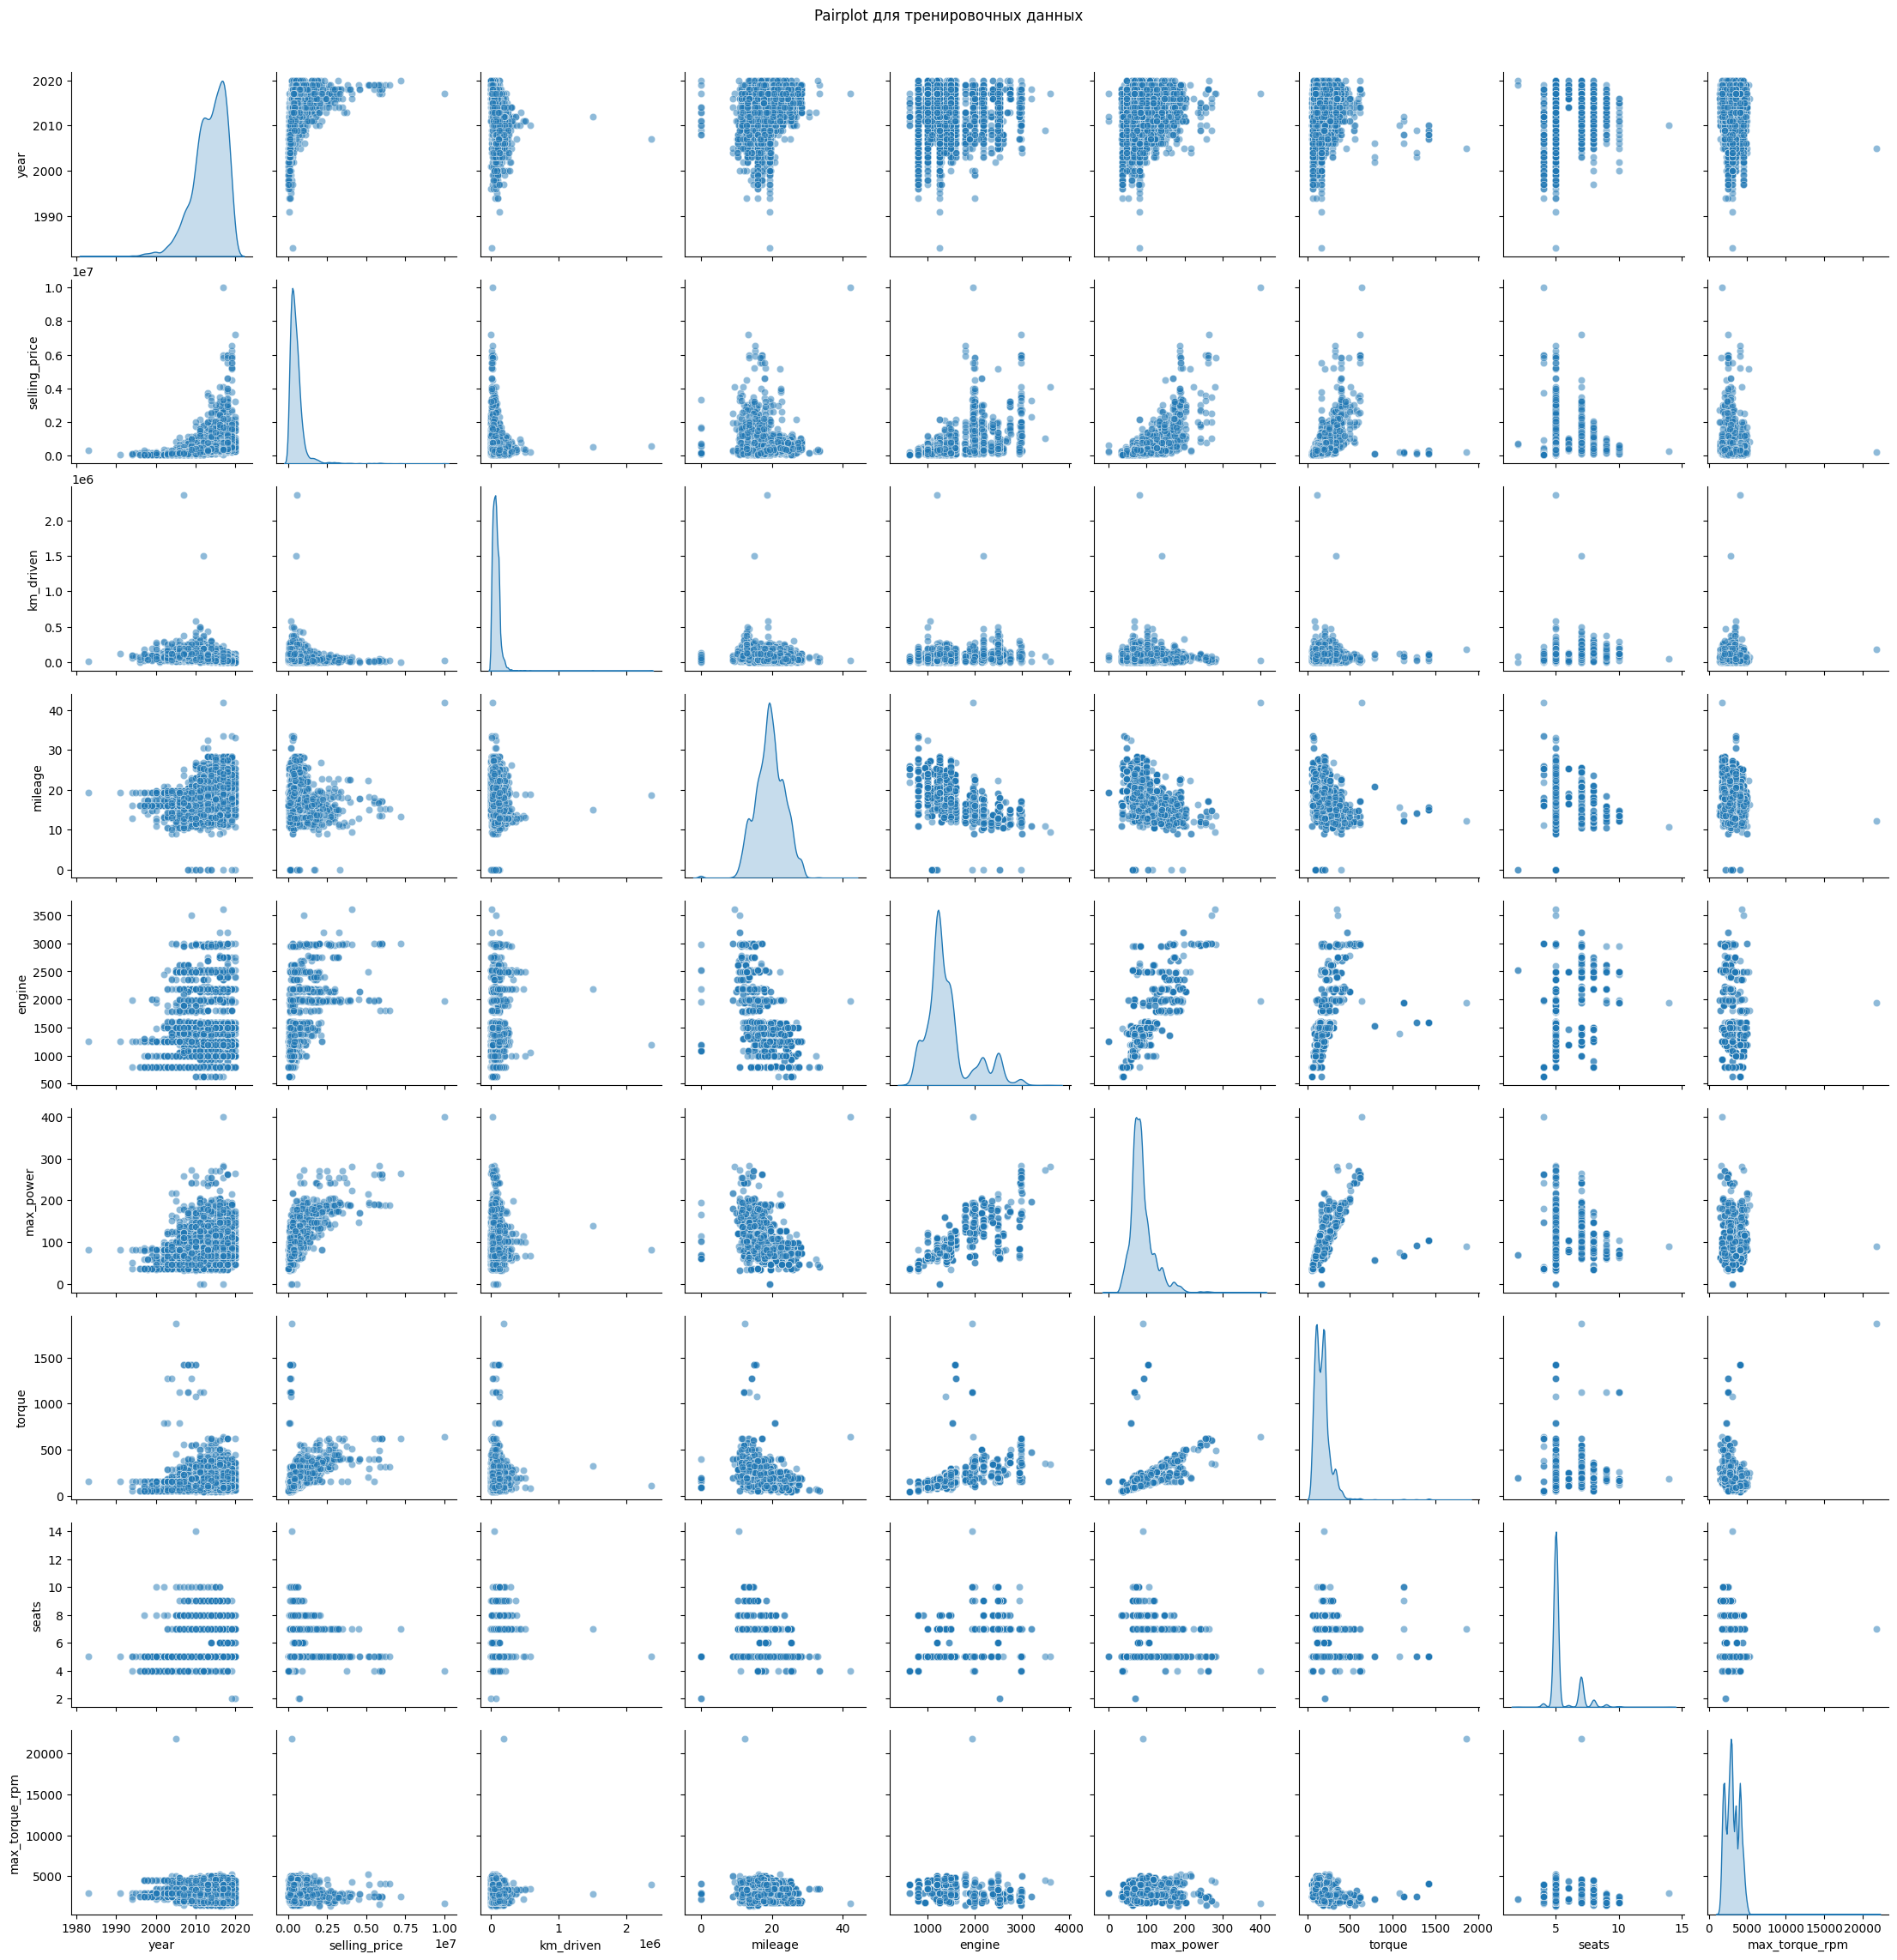

In [429]:
numerical_features = df_train.select_dtypes(include='number').columns

sns.pairplot(df_train[numerical_features], diag_kind="kde", plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot для тренировочных данных", y=1.02)
plt.show()


`1. Можно! На основе pairplot можно предположить, что признаки engine, max_power и torque имеют значительное влияние на таргет
2. Можно! Так же на pairplot видна высокая положительная корреляция признаков, например у max_power и torque
`

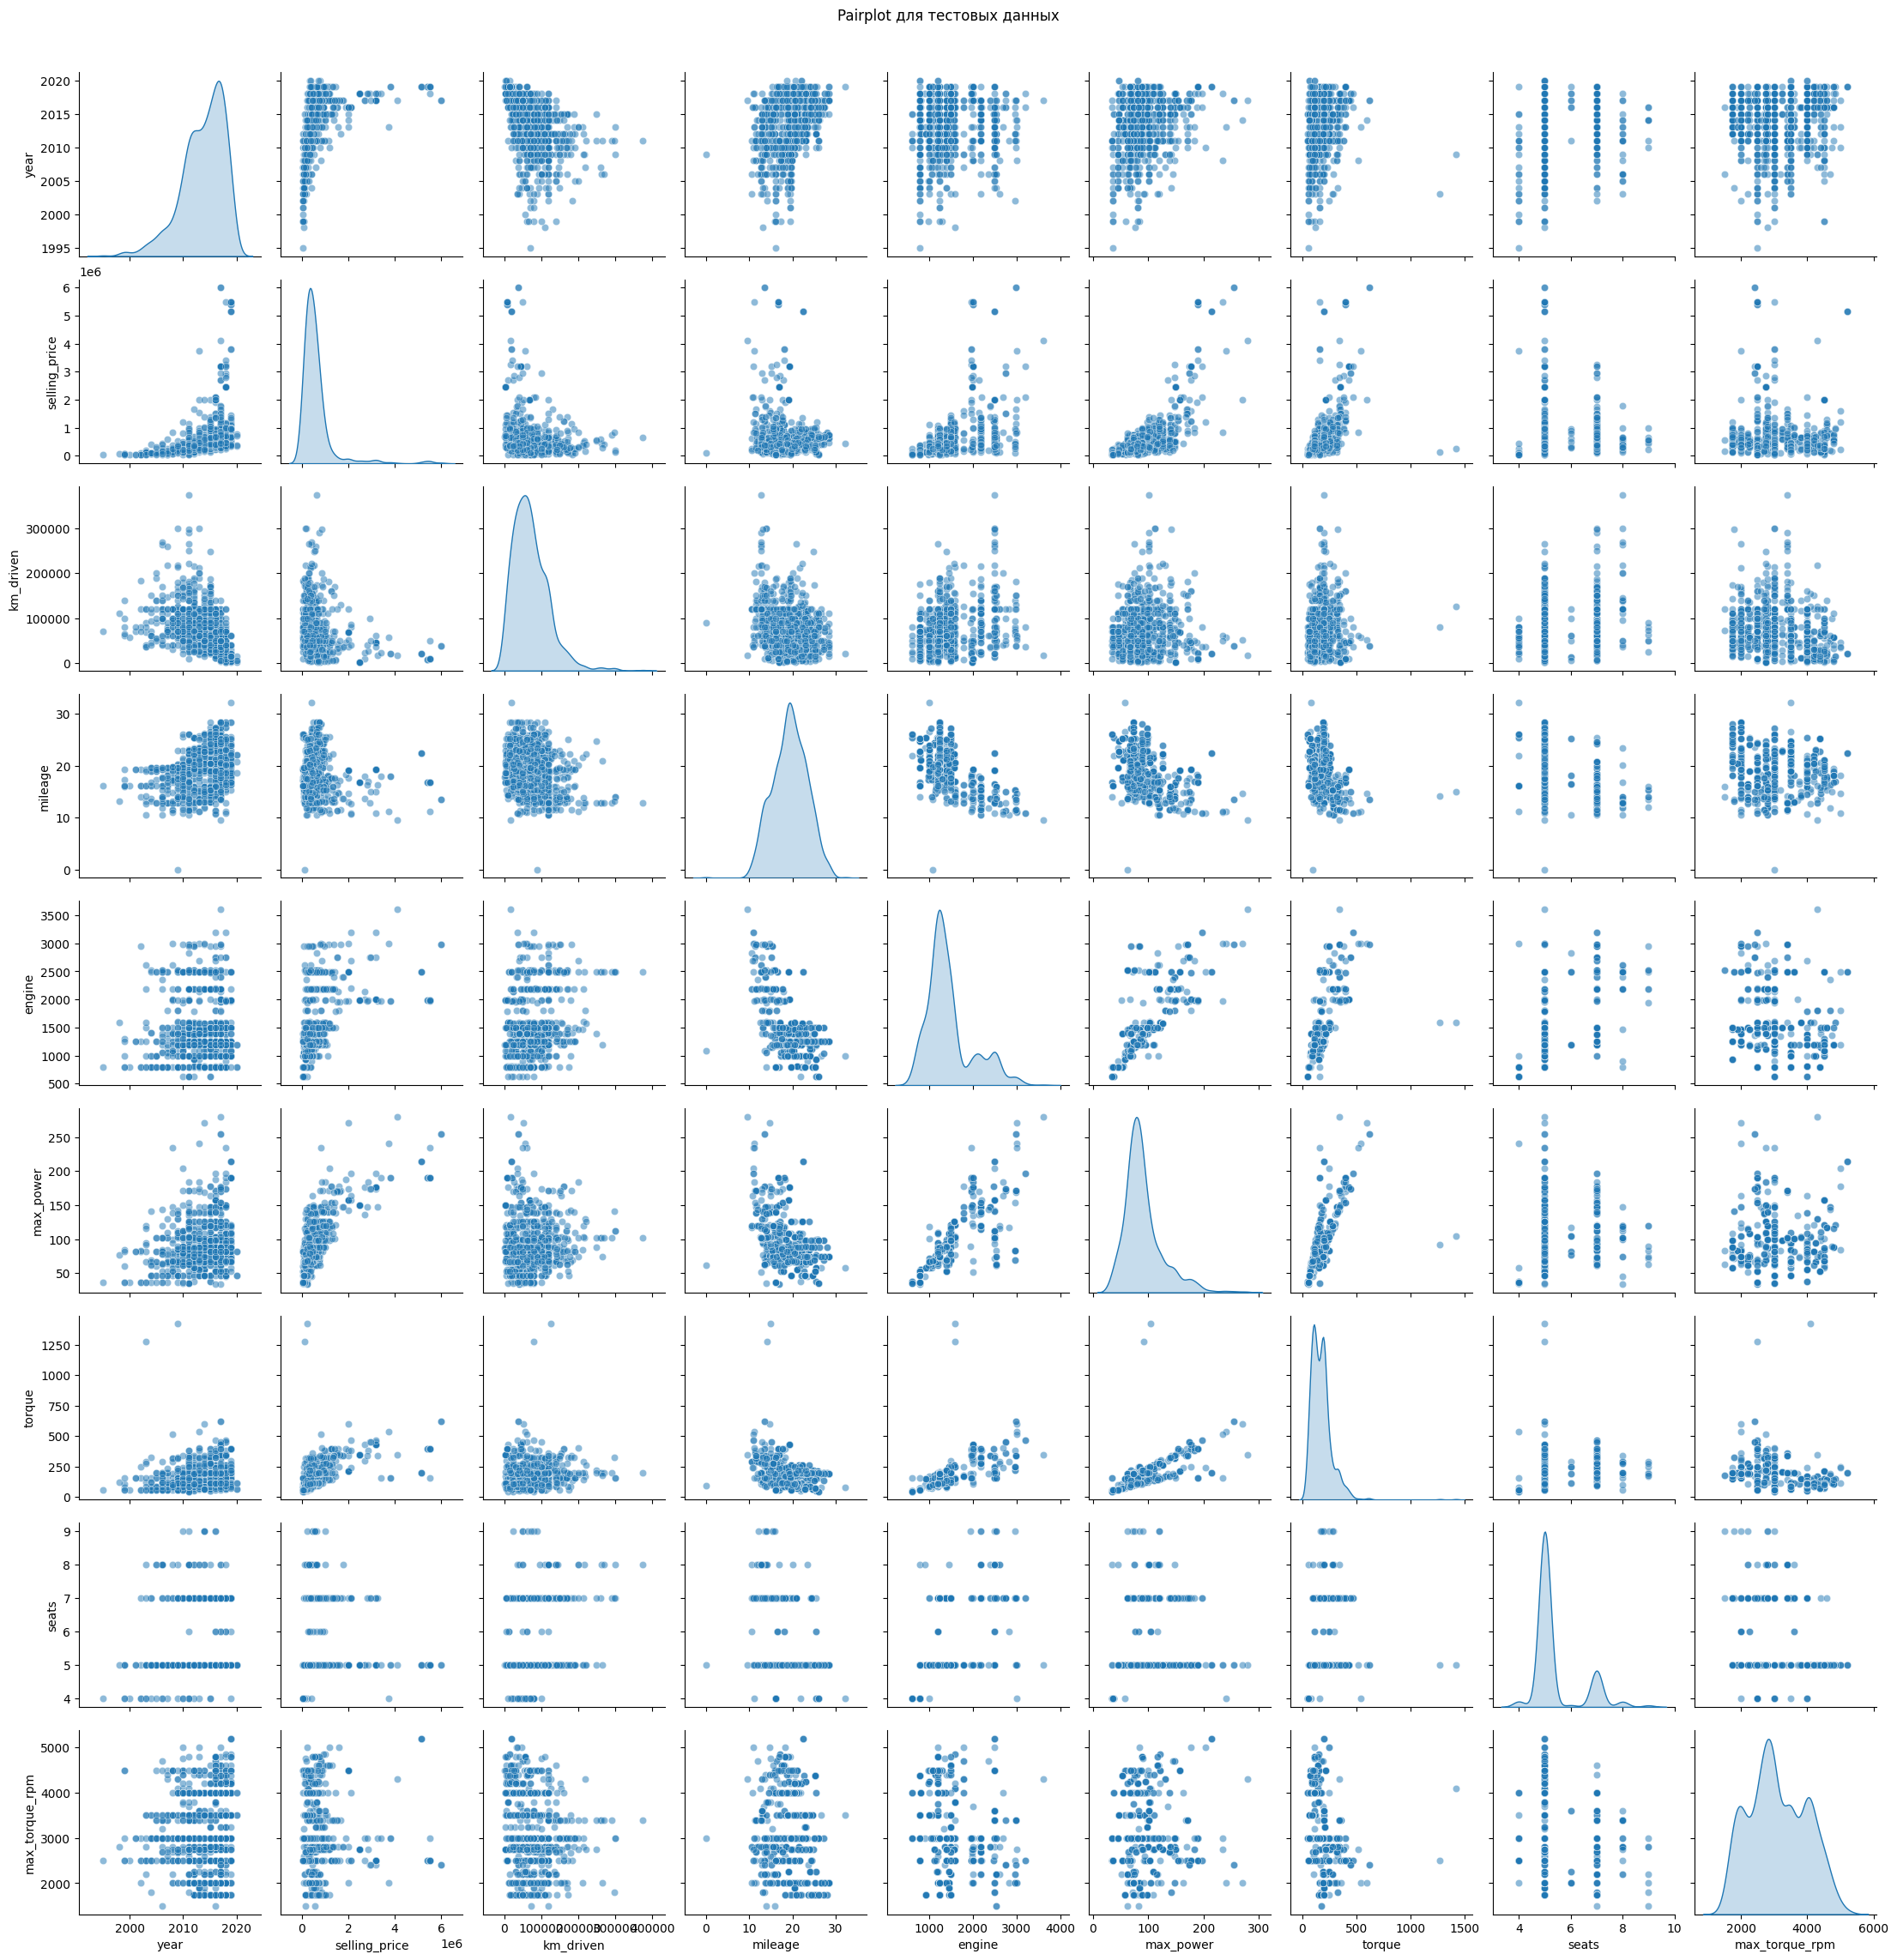

In [430]:
sns.pairplot(df_test[numerical_features], diag_kind="kde", plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot для тестовых данных", y=1.02)
plt.show()

`Похожи, однако, различия все же имеются, например в распределении признака km_driven`

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [x] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [x] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

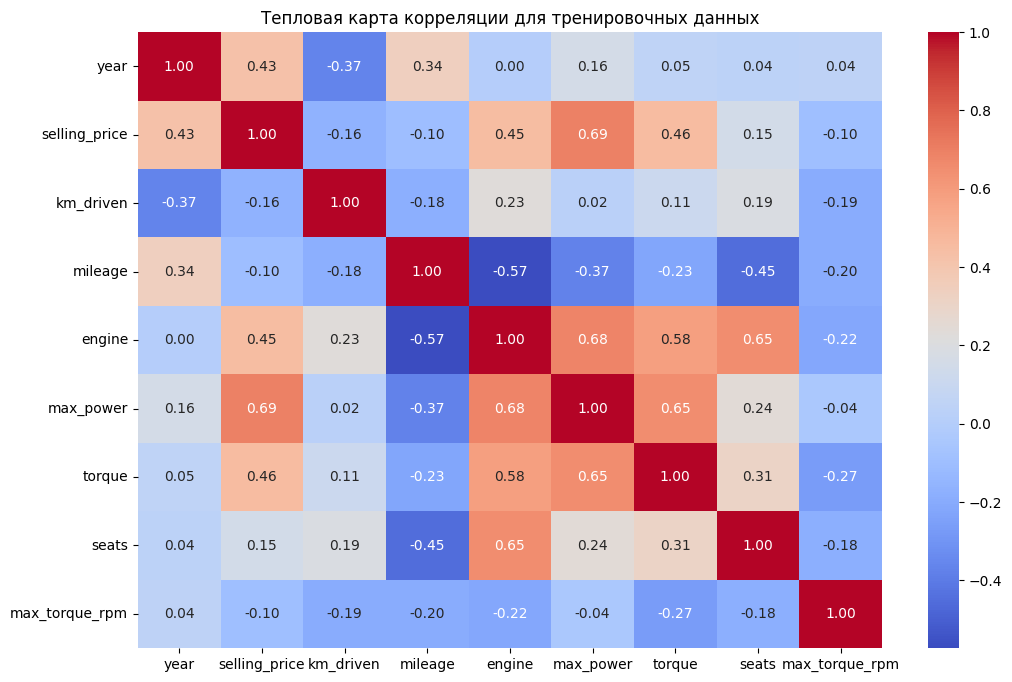

In [431]:
correlation_matrix = df_train[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Тепловая карта корреляции для тренировочных данных")
plt.show()

- [x] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`1. engine и year имеют 0-ую корреляцию
2. max_power и torque имеют сильную зависимость
3. Нет, и скорее даже немного наоброт, ибо корреляция между признаками year и km_driven низкая и отрицательная`

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [x] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [x] Проинтерпретируйте результаты


In [432]:
import numpy as np
from phik import phik_matrix
from scipy.stats import spearmanr, kendalltau

In [433]:
def spearman_corr(x, y):
    x_ranks = np.argsort(np.argsort(x))
    y_ranks = np.argsort(np.argsort(y))
    return np.corrcoef(x_ranks, y_ranks)[0, 1]

spearman_corr_custom = spearman_corr(df_train['year'], df_train['km_driven'])

In [434]:
spearman_corr_lib = spearmanr(df_train['year'], df_train['km_driven']).correlation

In [435]:
spearman_corr_custom, spearman_corr_lib

(-0.5662181285955704, -0.5696590682866404)

`разница между реализациями составляет около трех тысячных, что для анализа может не оказать незаметный характер`

In [436]:
correlation_matrix = df_train[numerical_features].phik_matrix()
correlation_matrix

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
year,1.000000,0.219841,0.081574,0.279253,0.213156,0.381639,0.183450,0.288178,0.282066
selling_price,0.219841,1.000000,0.000000,0.649768,0.503682,0.872166,0.687721,0.196447,0.205078
km_driven,0.081574,0.000000,1.000000,0.081625,0.210747,0.000000,0.000000,0.096223,0.048735
mileage,0.279253,0.649768,0.081625,1.000000,0.588155,0.687235,0.375468,0.679979,0.314255
engine,0.213156,0.503682,0.210747,0.588155,1.000000,0.720780,0.615972,0.603400,0.647341
max_power,0.381639,0.872166,0.000000,0.687235,0.720780,1.000000,0.827118,0.569587,0.267062
torque,0.183450,0.687721,0.000000,0.375468,0.615972,0.827118,1.000000,0.364482,0.953098
seats,0.288178,0.196447,0.096223,0.679979,0.603400,0.569587,0.364482,1.000000,0.311955
max_torque_rpm,0.282066,0.205078,0.048735,0.314255,0.647341,0.267062,0.953098,0.311955,1.000000


`если брать те же признаки для анализа, то year и engine имеют ненулевую корреляцию, как было в случае .corr(). max_power и torque имеют схожие значения. Хорошая библиотека с методом, который так же можно применять при анализе`

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

`стоило бы рассматреть признаки на графике boxplot для оценки выбросов и надобности в нормализации (и какой именно)`

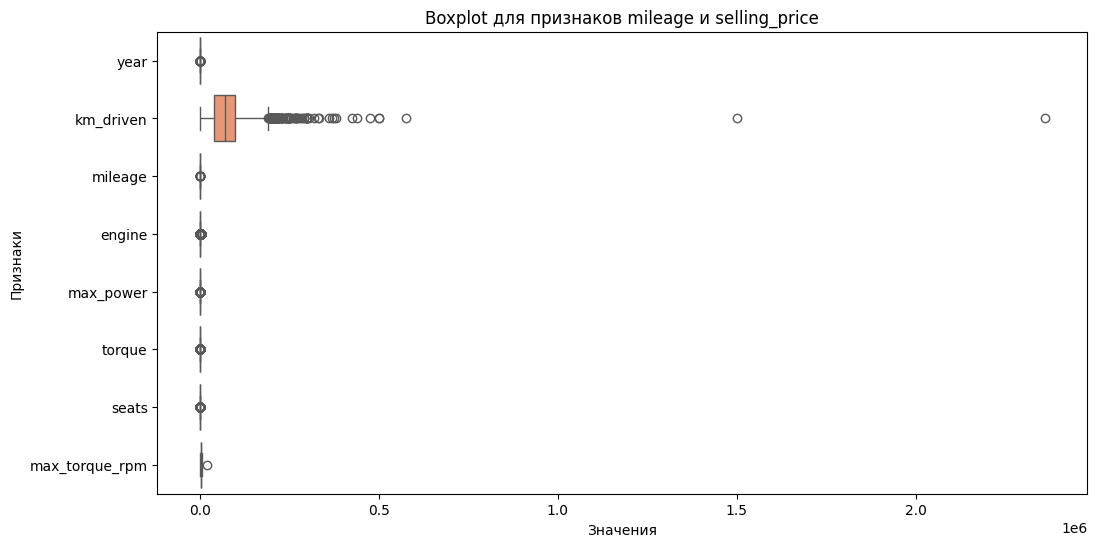

In [437]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train.select_dtypes(include='number').drop(columns='selling_price'), orient="h", palette="Set2")
plt.title("Boxplot для признаков mileage и selling_price")
plt.xlabel("Значения")
plt.ylabel("Признаки")
plt.show()

`на данном графике видно, что признак km_driven имеет выбросы, и сильно отличается по среднему значению и интерквантильному размаху. Этот признак стоит нормализировать в случае применения линейных моделей во избежание переобучения`

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [438]:
df_train_numeric = df_train.select_dtypes(include=['float64', 'int64']).copy()
df_test_numeric = df_test.select_dtypes(include=['float64', 'int64']).copy()

In [439]:
df_train_numeric['seats'] = df_train['seats']
df_test_numeric['seats'] = df_test['seats']

In [487]:
y_train = df_train_numeric.selling_price
X_train = df_train_numeric.drop(columns='selling_price')

In [488]:
X_train

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
0,2014,145500,23.40,1248,74.00,190.000,5,2000.0
1,2014,120000,21.14,1498,103.52,250.000,5,2500.0
2,2010,127000,23.00,1396,90.00,219.744,5,2750.0
3,2007,120000,16.10,1298,88.20,112.815,5,4500.0
4,2017,45000,20.14,1197,81.86,113.750,5,4000.0
...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,96.100,5,3000.0
5836,2013,50000,18.90,998,67.10,90.000,5,3500.0
5837,2013,110000,18.50,1197,82.85,113.700,5,4000.0
5838,2007,119000,16.80,1493,110.00,235.440,5,2750.0


In [489]:
# в чате писали по этой же проблема с просьбой обосновать и закомментировать код. Обоснование: нигде ранее, кроме этого задания не требовалось удалять столбцы, поэтому никак из датасета не могли пропасть численные признаки, поэтому их должно быть 8
# assert X_train.shape == (5840, 6)

In [581]:
y_test = df_test_numeric.selling_price
X_test = df_test_numeric.drop(columns='selling_price')

In [491]:
# assert X_test.shape == (1000, 6)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [x] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [x] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [492]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

base_model = LinearRegression()

base_model.fit(X_train, y_train)

LinearRegression()

In [493]:
print('MSE train:\t', MSE(y_train, base_model.predict(X_train)))
print('R2 train:\t', r2_score(y_train, base_model.predict(X_train)))

print('\nMSE test:\t', MSE(y_test, base_model.predict(X_test)))
print('R2 test:\t', r2_score(y_test, base_model.predict(X_test)))

MSE train:	 114773358059.47823
R2 train:	 0.5995882521612435

MSE test:	 230708545397.26614
R2 test:	 0.5986480783978707


`MSE из-за квадрата разницы выдет огромные значения, поэтому стоит опираться на r^2. Она же на train и test предсказаниях практически не расходится, что свидетельствует об отсутствии переобучения, но так же, из-за малого значения метрики, сигнализирует о недообучении модели`

### **Задание 13 (0.15 балла)**

- [x] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [494]:
def my_r2(y_test, y_pred):

    y_mean = np.mean(y_test)

    residual_sum_of_squares = np.sum((y_test - y_pred) ** 2)
    total_sum_of_squares = np.sum((y_test - y_mean) ** 2)
    
    return 1 - (residual_sum_of_squares / total_sum_of_squares)

my_r2(y_test, base_model.predict(X_test))

0.5986480783978707

`Ответ:`
$$R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}$$

- $\sum_{i=1}^n (y_i - \hat{y}_i)^2$ (остаточная сумма квадратов): это сумма квадратов отклонений истинных значений от предсказанных значений
   

- $\sum_{i=1}^n (y_i - \bar{y})^2$ (полная сумма квадратов): это сумма квадратов отклонений истинных значений от среднего значения целевой переменной \( \bar{y} \)

- отношение вычитаем из единицы для интерпритации как доля вероятности

### **Бонус (0.15 балла)**

- [x] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [x] Объясните, когда применяется $\text{adjusted}-R^2$?

In [495]:
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [496]:
adjusted_r2(0.5986480783978707, X_test.shape[1], X_test.shape[0])

1.0028292683295215

`Adjusted-R^2 используется, когда необходимо оценить качество модели с учётом количества признаков`

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [x] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [497]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [x] Какой признак оказался наиболее информативным в предсказании цены?

In [498]:
X_train.columns[abs(LinearRegression().fit(X_train_scaled, y_train).coef_).argmax()]

'max_power'

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [x] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [x] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [508]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1000.0, random_state=42) 
lasso_model.fit(X_train_scaled, y_train)
y_pred = lasso_model.predict(X_test_scaled)
print(f"R^2: {r2_score(y_test, y_pred)}")
print(f"MSE: {MSE(y_test, y_pred)}")

R^2: 0.5974025847421193
MSE: 231424490716.4586


`качество почти не изменилось`

In [510]:
(lasso_model.coef_ == 0).sum()

0

`у меня не занулилось. если зануляется коэфф то значит что признак неважен`

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [x] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [512]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]}

lasso = Lasso(random_state=42)

grid_search = GridSearchCV(estimator=lasso, 
                           param_grid=param_grid, 
                           scoring=make_scorer(MSE, greater_is_better=False), 
                           cv=10,
                           n_jobs=-1)

In [513]:
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']
print(f"Лучший параметр alpha: {best_alpha}")
print(f"Лучший MSE (на кросс-валидации): {-grid_search.best_score_:.4f}")

Лучший параметр alpha: 10.0
Лучший MSE (на кросс-валидации): 119707618777.2737


In [514]:
zero_coefficients = (best_model.coef_ == 0).sum()
print(f"Количество занулённых коэффициентов: {zero_coefficients}")

Количество занулённых коэффициентов: 0


1. `6 значений альфа * 10 фолдов = 60`
2. `alpha — коэффициент регуляризации в Lasso-регрессии`




**Ваша задача 2:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [x] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [515]:
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]
}

elastic_net = ElasticNet()

grid_search = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid,
    scoring=make_scorer(MSE, greater_is_better=False),
    cv=10,
    n_jobs=-1
)

In [516]:
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Лучшие параметры: {best_params}")
print(f"Лучший MSE (на кросс-валидации): {-grid_search.best_score_:.4f}")

Лучшие параметры: {'alpha': 0.1, 'l1_ratio': 0.9}
Лучший MSE (на кросс-валидации): 119648996856.7625


1. `6 alpha * 5 l1_ratio * 10 cv = 300`
2. `{'alpha': 0.1, 'l1_ratio': 0.9}`

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [x] Реализуйте модель с $L0$-регуляризаицей.
- [x] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [x] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



`кодом вдохновился тут https://github.com/bobondemon/l0_regularization_practice/tree/main`

In [518]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

class L0RegularizedRegression(BaseEstimator, RegressorMixin):
    def __init__(self, 
                 lambda_: float = 1.0, 
                 max_iter: int = 100, 
                 tol: float = 1e-4):
        
        self.lambda_ = lambda_
        self.max_iter = max_iter
        self.tol = tol
        self.model = LinearRegression()

    def fit(self, X, y):
        self.coef_ = np.zeros(X.shape[1])
        self.intercept_ = 0
        prev_loss = float('inf')

        for iteration in range(self.max_iter):
            self.model.fit(X, y)
            self.coef_ = self.model.coef_
            self.intercept_ = self.model.intercept_

            mse = mean_squared_error(y, self.model.predict(X))
            l0_penalty = self.lambda_ * np.sum(self.coef_ != 0)
            loss = mse + l0_penalty

            if abs(prev_loss - loss) < self.tol:
                break
            prev_loss = loss

            self.coef_[np.abs(self.coef_) < self.lambda_] = 0

        return self

    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_

In [519]:
l0_model = L0RegularizedRegression(lambda_=0.1, max_iter=100, tol=1e-4)
l0_model.fit(X_train_scaled, y_train)

L0RegularizedRegression(lambda_=0.1)

In [520]:
y_pred_train = l0_model.predict(X_train_scaled)
y_pred_test = l0_model.predict(X_test_scaled)

In [521]:
print(f"Train MSE: {MSE(y_train, y_pred_train):.4f}")
print(f"Test MSE: {MSE(y_test, y_pred_test):.4f}")
print(f"Количество ненулевых коэффициентов: {np.sum(l0_model.coef_ != 0)}")

Train MSE: 114773358059.4780
Test MSE: 230708545397.2628
Количество ненулевых коэффициентов: 8


`не знаю где и что я пропустил, чтобы признаки не занулялись, возможно, из-за объема домашнего задания замылился глаз, но результаты с l0 стали немного лучше`

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [x] Предобработайте столбец `name`, чтобы избежать его удаления

In [523]:
df_train.name

0                  Maruti Swift Dzire VDI
1            Skoda Rapid 1.5 TDI Ambition
2               Hyundai i20 Sportz Diesel
3                  Maruti Swift VXI BSIII
4           Hyundai Xcent 1.2 VTVT E Plus
                      ...                
5835              Hyundai Santro Xing GLS
5836    Maruti Wagon R VXI BS IV with ABS
5837                    Hyundai i20 Magna
5838                Hyundai Verna CRDi SX
5839               Maruti Swift Dzire ZDi
Name: name, Length: 5840, dtype: object

In [524]:
def preprocess_name(name):
    parts = name.split(' ')
    brand = parts[0]
    model = parts[1]
    features = ' '.join(parts[2:]) if len(parts) > 2 else None
    return pd.Series([brand, model, features])

# Применяем функцию ко всему столбцу `name`
X_train[['brand', 'model', 'features']] = df_train['name'].apply(preprocess_name)
X_test[['brand', 'model', 'features']] = df_test['name'].apply(preprocess_name)

In [546]:
X_train_cat = X_train.copy()
X_test_cat = X_test.copy()

In [547]:
assert X_train_cat.shape == (5840, 11)

In [548]:
X_train_cat.describe(include='object')

,brand,model,features
count,5840,5840,5840
unique,30,202,1792
top,Maruti,Swift,Dzire VDI
freq,1804,558,91


### **Задание 20 (0.1 балла)**

- [x] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [549]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

categorical_columns = ['brand', 'model', 'features', 'seats']
encoded_features = encoder.fit_transform(X_train_cat[categorical_columns])

In [550]:
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

In [551]:
X_train_enc = pd.concat([X_train_cat.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

In [552]:
X_train_enc.drop(columns=categorical_columns, inplace=True)

In [553]:
X_train_enc

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,brand_Audi,brand_BMW,brand_Chevrolet,...,features_xDrive20d,features_xDrive30d,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,145500,23.40,1248,74.00,190.000,2000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,120000,21.14,1498,103.52,250.000,2500.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,127000,23.00,1396,90.00,219.744,2750.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007,120000,16.10,1298,88.20,112.815,4500.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,45000,20.14,1197,81.86,113.750,4000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,96.100,3000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5836,2013,50000,18.90,998,67.10,90.000,3500.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5837,2013,110000,18.50,1197,82.85,113.700,4000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5838,2007,119000,16.80,1493,110.00,235.440,2750.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

1. `Кодировать категориальные признаки с малым количеством значений, обучаться только на трейне и удалять один столбец`
2. `Во избежание линейной зависимости, которая вызывает мультиколлинеарность, ухудшает стабильность и интерпретируемость модели и в целом это плохо для линейных моделей`
3. `Можно, но если модель показала неважность избранных категорий, но так все равно лучше не делать`

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [x] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [x] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [559]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

ridge = Ridge()
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring=make_scorer(r2_score),
    cv=10, 
    n_jobs=-1
)

grid_search.fit(X_train_cat.drop(columns=['brand', 'model', 'features']), y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring=make_scorer(r2_score, response_method='predict'))

In [595]:
X_train_cat.drop(columns=['brand', 'model', 'features']).dtypes

year                int64
km_driven           int64
mileage           float64
engine              int64
max_power         float64
torque            float64
seats               int64
max_torque_rpm    float64
dtype: object

In [560]:
best_ridge_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

In [561]:
print(f"R^2 на тренировочных данных: {r2_score(y_train, best_ridge_model.predict(X_train_cat.drop(columns=['brand', 'model', 'features'])))}")
print(f"R^2 на тестовых данных: {r2_score(y_test, best_ridge_model.predict(X_test_cat.drop(columns=['brand', 'model', 'features'])))}")

R^2 на тренировочных данных: 0.5995882521612418
R^2 на тестовых данных: 0.598648076936708


`не удалось. А еще уточняйте пожалуйста на каких данных нужно обучаться`

In [591]:
import pickle

In [592]:
with open('model.pkl', 'wb') as file:
    pickle.dump(best_ridge_model, file)

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

`5/5`

In [565]:
print('Создание новых признаков')
pd.Series(df_train['max_power'] / df_train['engine'])

Создание новых признаков


0       0.059295
1       0.069105
2       0.064470
3       0.067951
4       0.068388
          ...   
5835    0.057182
5836    0.067234
5837    0.069215
5838    0.073677
5839    0.059215
Length: 5840, dtype: float64

In [566]:
print('Учет нелинейности в данных')
df_train['year'] ** 2

Учет нелинейности в данных


0       4056196
1       4056196
2       4040100
3       4028049
4       4068289
         ...   
5835    4032064
5836    4052169
5837    4052169
5838    4028049
5839    4036081
Name: year, Length: 5840, dtype: int64

In [568]:
print('В примере с boxplot я указывал на надобность нормализации признаков, можно логарифмировать признак, во избежание выбросов')
np.log1p(df_train['km_driven'])

В примере с boxplot я указывал на надобность нормализации признаков, можно логарифмировать признак, во избежание выбросов


0       11.887938
1       11.695255
2       11.751950
3       11.695255
4       10.714440
          ...    
5835    12.160034
5836    10.819798
5837    11.608245
5838    11.686887
5839    11.695255
Name: km_driven, Length: 5840, dtype: float64

In [569]:
df_train['name'].str.contains(r'AMT|Automatic').astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
5835    0
5836    0
5837    0
5838    0
5839    0
Name: name, Length: 5840, dtype: int64

In [571]:
print('идея из пункта 2')
df_train['name'].str.extract(r'(Diesel|Petrol|CNG|Electric)', expand=False)

идея из пункта 2


0          NaN
1          NaN
2       Diesel
3          NaN
4          NaN
         ...  
5835       NaN
5836       NaN
5837       NaN
5838       NaN
5839       NaN
Name: name, Length: 5840, dtype: object

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [x] Реализуйте метрику `business_metric`
- [x] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

`вы бы хоть предупредили, что нужно сохранять предсказания... все 22 задания я отказываюсь переделывать, чтобы это задание было выполнено верно (у данных разные предобработки)`

In [573]:
def business_metric(y_true, y_pred):
    relative_error = np.abs(y_pred - y_true) / y_true
    within_threshold = relative_error <= 0.1
    
    return np.mean(within_threshold)

In [584]:
print(business_metric(y_test, base_model.predict(X_test)))
print(business_metric(y_test, lasso_model.predict(X_test_scaled)))
print(business_metric(y_test, best_model.predict(X_test_scaled)))
print(business_metric(y_test, l0_model.predict(X_test_scaled)))
print(business_metric(y_test, best_ridge_model.predict(X_test_cat.drop(columns=['brand', 'model', 'features']))))

0.239
0.239
0.239
0.239
0.239


### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [x] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [x] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [586]:
def your_business_metrics(y_true, y_pred):
    error = y_pred - y_true
    penalty = np.where(error < 0, np.abs(error) * 1.5, np.abs(error))
    normalized_penalty = penalty / y_true
    
    return np.mean(normalized_penalty)

In [587]:
print(your_business_metrics(y_test, base_model.predict(X_test)))
print(your_business_metrics(y_test, lasso_model.predict(X_test_scaled)))
print(your_business_metrics(y_test, best_model.predict(X_test_scaled)))
print(your_business_metrics(y_test, l0_model.predict(X_test_scaled)))
print(your_business_metrics(y_test, best_ridge_model.predict(X_test_cat.drop(columns=['brand', 'model', 'features']))))

0.7870051044101872
0.7836144136440603
0.7792944013918759
0.7870051044101929
0.7870050999836922


# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>